<a href="https://colab.research.google.com/github/coryroyce/code_assignments/blob/main/220225_HW_3a_DNN_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network



CMPE 252 HW 3a

Cory Randolph

2/25/2022

# Prompt

1. Assume you receive real-estate data for 1000 samples as input and each sample has 25 different features/attributes. Make fake data like this. Then design a 3 layers fully connected network to predict the value of a house for sale (test section).  Assign 90 to 10 ratio for splitting train and test sets. Include at least one sort of regularization and apply 1000 iterations for your training step. Besides these, as a designer, feel free to set the rest of your network hyperparameters as you wish.

# Imports

Import other needed packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Data

## Create Data

Create fake real estate data that has 1,000 samples and 25 features. Since we are trying to predict housing prices this will be a regression problem.

Note, to explore only make 20 of the features informative

In [ ]:
X, y = make_regression(n_samples=1000, n_features=25, n_informative=20, n_targets=1, shuffle=True, random_state= 3, noise= 0.05)

Since the output of Y is inbetween -1,000 and 1,000, let's modify it to look more like house prices ~$500,000 on average

In [ ]:
y = (y + 1000)*500

Convert to dataframe

In [ ]:
df = pd.DataFrame(X)
df['house_price'] = pd.DataFrame(y)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,house_price
0,0.658475,1.027337,-1.410353,0.879219,-0.225630,-1.173882,2.523388,0.668982,-1.229245,1.588026,-1.034465,-0.969529,-1.016559,0.560920,-0.679864,0.150396,-1.278707,-2.286373,1.616082,1.037195,-0.574020,-0.892467,-1.257064,-0.756587,0.124945,263040.520944
1,0.785161,0.782816,-0.191103,-0.883377,-1.588342,0.754636,1.033975,-1.359998,-1.286592,-0.163189,0.003409,-0.031168,-0.243750,-0.144286,0.892890,0.841959,0.218460,0.286210,-0.166528,-0.512314,1.717876,0.350189,-1.984783,-0.367703,1.219917,456953.944640
2,0.957803,2.150810,-0.533007,-0.721971,1.119839,0.108555,1.490593,-0.752021,-1.118422,-0.967979,-1.172553,-0.170576,-0.216147,0.822723,-0.301390,1.472188,-1.011320,-0.716906,0.188618,-1.849944,0.379008,-0.292085,-1.891182,-1.178911,-1.522164,338272.393217
3,-0.651358,0.813502,0.037347,0.543407,1.806811,-0.013874,0.661915,0.764996,-0.691025,-1.980066,0.310284,-2.728440,-0.699344,-0.642795,1.358414,0.668516,-0.756497,-0.006734,0.452107,-0.001039,-0.777902,0.950342,-1.191599,1.001141,-1.133366,255036.586139
4,0.972487,0.941787,-0.115327,-0.512469,-0.065553,-0.552614,-0.746836,1.349885,0.378931,1.366856,-0.557192,-0.536774,1.375796,-1.798806,0.757385,2.282416,0.070678,1.084318,-0.519793,1.148174,0.443723,0.401171,-1.994043,-0.287858,-0.440960,569296.707701


Show Overall Stats

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,house_price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.007323,-0.030115,0.002106,0.005301,0.034134,-0.008539,-0.052424,-0.018478,0.009649,-0.005526,-0.003360,-0.004894,0.007974,0.014160,-0.012833,-0.047898,0.004983,-0.018633,-0.011072,0.021578,-0.054856,-0.024439,-0.019126,-0.028136,-0.017363,495172.851642
std,1.031326,1.018773,0.985067,0.994970,0.988567,0.987167,0.988329,1.003447,1.006092,0.977518,0.976472,1.000110,0.960119,1.014333,1.009463,1.015364,0.980976,1.004224,0.993400,0.974670,0.992476,1.033312,1.022895,0.957434,1.007289,124018.218901
min,-3.749941,-2.935881,-3.083502,-4.602975,-3.088873,-3.709327,-2.909921,-3.096727,-2.937027,-2.894803,-3.031649,-3.555050,-2.980150,-3.864673,-3.539109,-3.197139,-3.103761,-2.990175,-2.910933,-3.511154,-2.873760,-3.173982,-3.260924,-2.744894,-3.027048,18649.890634
25%,-0.679897,-0.710534,-0.640792,-0.684997,-0.629317,-0.674977,-0.717840,-0.711550,-0.616775,-0.688180,-0.660656,-0.658688,-0.628597,-0.644720,-0.694287,-0.783802,-0.672443,-0.694432,-0.682956,-0.659791,-0.778766,-0.713417,-0.754044,-0.674077,-0.738710,408577.244542
50%,0.041892,0.009455,0.022659,0.008510,0.030574,0.019748,-0.076187,-0.040663,0.033924,0.049738,0.016572,-0.031653,0.024478,0.008495,0.002458,-0.004804,0.027105,-0.019875,-0.025970,0.028555,-0.046170,-0.019105,-0.029871,-0.054082,-0.004681,496081.170940
75%,0.721743,0.646576,0.677690,0.663917,0.684880,0.643584,0.563612,0.669215,0.706165,0.679777,0.649925,0.646002,0.633010,0.680691,0.664313,0.658769,0.691412,0.655669,0.702164,0.694310,0.609797,0.668017,0.695797,0.613013,0.649009,577351.875810
max,3.505557,3.255997,2.533155,3.100487,3.625287,3.097583,3.702458,2.987673,3.398161,3.314304,2.836876,3.283285,3.226925,4.091393,3.666283,2.885745,2.932865,3.010803,4.366930,2.870743,3.045780,2.987198,2.914951,3.137289,3.372637,940425.143463


## Prepare Data

Split the data into train and test sets (90-10 ratio)

In [ ]:
y = df['house_price']					        # labels
X = df.drop(['house_price'],axis=1)   # features


# Apply train and test splits 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

# Create ML Model

Create the Layers model

In [ ]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Dense(16, input_dim=25, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

Display model architecture

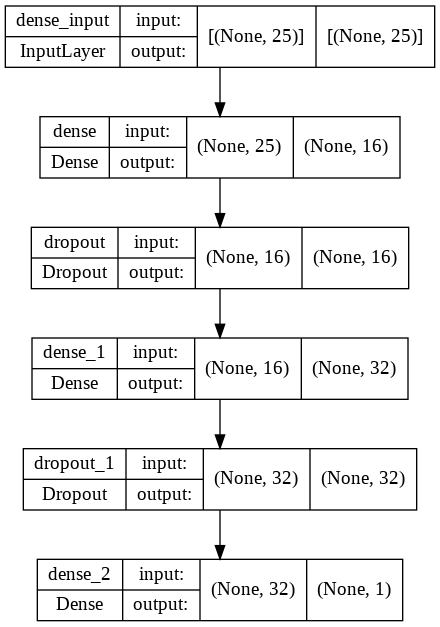

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)#), rankdir="LR")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                416       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


## Fit Model

Compile and Fit Model with 1000 training steps.

In [ ]:
model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))

In [ ]:
history = model.fit(x = X_train,
                    y = y_train,
                    validation_data = (X_test, y_test),
                    epochs= 1000)


# Clear output for this cell
from IPython.display import clear_output
clear_output()

## Review Metrics

Display the overall results

In [ ]:
# history.history

Plot Training History

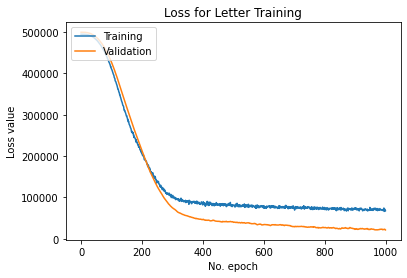

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Letter Training')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['Training', 'Validation'], loc="upper left")
plt.show()

Plot metrics

In [ ]:
# Create predictions for the whole test set and convert them to labels (A,B,C...)
y_test_preds = model.predict(X_test)

Text(0, 0.5, 'Predicted House Prices')

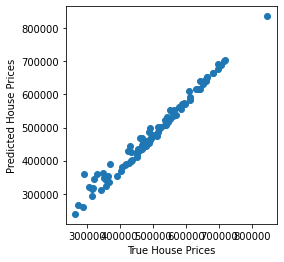

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_test_preds)
plt.xlabel('True House Prices')
plt.ylabel('Predicted House Prices')
